# Text Mining-2 -  Sentiment Analysis of Amazon Reviews

### Perform sentimental analysis on the reviews 

1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

#### Data Description:

Text data :  Customer reviews of a product in ecommerce website - Amazon

### Step-1 : Import libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
!pip install -U spacy
!python -m spacy download en_core_web_sm
import string
import spacy
!pip install wordcloud

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import tokenize
nltk.download('punkt')
nltk.download('stopwords')

from bs4 import BeautifulSoup as bs
import requests

import warnings as warnings
warnings.filterwarnings("ignore")

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chait\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chait\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Step-2 : Extract reviews of any product from ecommerce website - Amazon

#### Copy the link of reviews

In [10]:
link = 'https://www.amazon.in/product-reviews/B09NMD96QD/ref=cm_cr_arp_d_viewpnt_rgt/000-0000000-0000000?pd_rd_w=cDXyq&pf_rd_p=b2e19b55-ab1c-4793-ad21-2516d68e48ae&pf_rd_r=E7NJYVN3CD2H6HVK5BJR&pd_rd_r=8948bcb5-bf78-441f-9728-b58de46fffb8&pd_rd_wg=WUCpT&pd_rd_i=B09NMD96QD&filterByStar=critical&pageNumber=UTF-8'

In [11]:
page = requests.get(link)
page

<Response [200]>

In [12]:
page.content[:1000]

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n\n<!-- sp:end-feature:csm:head-open-part2 -->\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41C-I1lXVwL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,0

In [13]:
soup = bs(page.content,'html.parser')
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:csm:head-open-part2 -->
  <!-- sp:end-feature:csm:head-open-part2 -->
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41C-I1lXVwL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L

#### Extracting the necessary details from the whole content

In [14]:
names = soup.find_all('span',class_='a-profile-name')
names

[<span class="a-profile-name">Shailesh pandey</span>,
 <span class="a-profile-name">Adish Jain</span>,
 <span class="a-profile-name">Shradha Menon</span>,
 <span class="a-profile-name">Amit Yadav</span>,
 <span class="a-profile-name">Yajat Pura</span>,
 <span class="a-profile-name">MASS</span>,
 <span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Tokle</span>,
 <span class="a-profile-name">Aditya D.</span>,
 <span class="a-profile-name">Pravendra Singh</span>,
 <span class="a-profile-name">NagaRaju</span>,
 <span class="a-profile-name">ramhesh</span>]

In [15]:
cust_name = []
for i in range(0,len(names)):
    cust_name.append(names[i].get_text())
cust_name

['Shailesh pandey',
 'Adish Jain',
 'Shradha Menon',
 'Amit Yadav',
 'Yajat Pura',
 'MASS',
 'Amazon Customer',
 'Tokle',
 'Aditya D.',
 'Pravendra Singh',
 'NagaRaju',
 'ramhesh']

In [16]:
cust_name.pop(0)

'Shailesh pandey'

In [17]:
cust_name.pop(0)

'Adish Jain'

In [18]:
cust_name

['Shradha Menon',
 'Amit Yadav',
 'Yajat Pura',
 'MASS',
 'Amazon Customer',
 'Tokle',
 'Aditya D.',
 'Pravendra Singh',
 'NagaRaju',
 'ramhesh']

In [19]:
len(cust_name)

10

In [20]:
title = soup.find_all('a',class_='review-title-content')
title

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RMGBWOPWA09IN?ASIN=B09NMD96QD">
 <span>Very bad design by philips</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R3U8MYW39MA2SQ?ASIN=B09NMD96QD">
 <span>Overall is good</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R3GQ03WVN5KXY8?ASIN=B09NMD96QD">
 <span>Good</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1EVNYSGRKT75V?ASIN=B09NMD96QD">
 <span>Phillips no quality maintain</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="revi

In [21]:
review_title = []
for i in range(0,len(title)):
    review_title.append(title[i].get_text())
review_title

['\nVery bad design by philips\n',
 '\nOverall is good\n',
 '\nGood\n',
 '\nPhillips no quality maintain\n',
 '\nWorthy\n',
 '\nNot a bad product\n',
 '\nDecent\n',
 '\nBattery backup is super but I am not happy with the blade sharpness rest is fine.\n',
 '\nMissing parts\n',
 '\nBrown packing\n']

In [22]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]
review_title

['Very bad design by philips\n',
 'Overall is good\n',
 'Good\n',
 'Phillips no quality maintain\n',
 'Worthy\n',
 'Not a bad product\n',
 'Decent\n',
 'Battery backup is super but I am not happy with the blade sharpness rest is fine.\n',
 'Missing parts\n',
 'Brown packing\n']

In [23]:
review_title[:] = [titles.rstrip('\n') for titles in review_title]
review_title

['Very bad design by philips',
 'Overall is good',
 'Good',
 'Phillips no quality maintain',
 'Worthy',
 'Not a bad product',
 'Decent',
 'Battery backup is super but I am not happy with the blade sharpness rest is fine.',
 'Missing parts',
 'Brown packing']

In [24]:
len(review_title)

10

In [25]:
rating = soup.find_all('i',class_='review-rating')
rating

[<i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating-view-point"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-2 review-rating" data-hook="review-star-rating-view-point"><span class="a-icon-alt">2.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-3 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">3.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-3 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">3.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-3 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">3.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-3 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">3.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-3 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">3.0 out of 5 stars</sp

In [26]:
rate = []
for i in range(0,len(rating)):
    rate.append(rating[i].get_text())
rate

['5.0 out of 5 stars',
 '2.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars']

In [27]:
rate.pop(0)

'5.0 out of 5 stars'

In [28]:
rate.pop(0)

'2.0 out of 5 stars'

In [29]:
rate

['3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars']

In [30]:
len(rate)

10

In [31]:
review = soup.find_all("span",{"data-hook":"review-body"})
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Trimmer is great for trimming but very annoying to clean.<br/>There is lots of gap between the blades and the body, they should have designed it better</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>I m using this trimmer overall is good cleaning good</span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Overalla good product.<br>Blades are sharp and build quality is good too.<br/>I had thebolder version for around 8 yrs qt4005<br/>And i loved that design too much.<br/>The design here is good but not as compared to before....it could be due to bigger battery.<br/>Charging time has decreased a lot and runtime had improved.<br/>So a good update for an old user like me</br></span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Blade 

In [32]:
review_content = []
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content

['\nTrimmer is great for trimming but very annoying to clean.There is lots of gap between the blades and the body, they should have designed it better\n',
 '\nI m using this trimmer overall is good cleaning good\n',
 '\nOveralla good product.Blades are sharp and build quality is good too.I had thebolder version for around 8 yrs qt4005And i loved that design too much.The design here is good but not as compared to before....it could be due to bigger battery.Charging time has decreased a lot and runtime had improved.So a good update for an old user like me\n',
 "\nBlade is no sharp cut .it's normal trimmer hair  cutting\n",
 '\nGood one\n',
 '\nNot a bad product, but it is not good as I purchased the trimmer 7 years ago\n',
 "\nI bought this thinking it was a wet and dry type trimmer. Realised it's only dry use. Amazon wouldn't take it back as I wanted to return this and get a wet & dry type one.The trimmer is good for a relatively close shave but is kind of bulky and odd to hold. They sh

In [33]:
review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
review_content

['Trimmer is great for trimming but very annoying to clean.There is lots of gap between the blades and the body, they should have designed it better\n',
 'I m using this trimmer overall is good cleaning good\n',
 'Overalla good product.Blades are sharp and build quality is good too.I had thebolder version for around 8 yrs qt4005And i loved that design too much.The design here is good but not as compared to before....it could be due to bigger battery.Charging time has decreased a lot and runtime had improved.So a good update for an old user like me\n',
 "Blade is no sharp cut .it's normal trimmer hair  cutting\n",
 'Good one\n',
 'Not a bad product, but it is not good as I purchased the trimmer 7 years ago\n',
 "I bought this thinking it was a wet and dry type trimmer. Realised it's only dry use. Amazon wouldn't take it back as I wanted to return this and get a wet & dry type one.The trimmer is good for a relatively close shave but is kind of bulky and odd to hold. They should have desi

In [34]:
review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
review_content

['Trimmer is great for trimming but very annoying to clean.There is lots of gap between the blades and the body, they should have designed it better',
 'I m using this trimmer overall is good cleaning good',
 'Overalla good product.Blades are sharp and build quality is good too.I had thebolder version for around 8 yrs qt4005And i loved that design too much.The design here is good but not as compared to before....it could be due to bigger battery.Charging time has decreased a lot and runtime had improved.So a good update for an old user like me',
 "Blade is no sharp cut .it's normal trimmer hair  cutting",
 'Good one',
 'Not a bad product, but it is not good as I purchased the trimmer 7 years ago',
 "I bought this thinking it was a wet and dry type trimmer. Realised it's only dry use. Amazon wouldn't take it back as I wanted to return this and get a wet & dry type one.The trimmer is good for a relatively close shave but is kind of bulky and odd to hold. They should have designed the tri

In [35]:
len(review_content)

10

#### Creating the data set with the details extracted

In [36]:
import pandas as pd
revw_data = pd.DataFrame()
revw_data['Customer Name']=cust_name
revw_data['Review title']=review_title
revw_data['Ratings']=rate
revw_data['Reviews']=review_content
revw_data

,Customer Name,Review title,Ratings,Reviews
0,Shradha Menon,Very bad design by philips,3.0 out of 5 stars,Trimmer is great for trimming but very annoyin...
1,Amit Yadav,Overall is good,3.0 out of 5 stars,I m using this trimmer overall is good cleanin...
2,Yajat Pura,Good,3.0 out of 5 stars,Overalla good product.Blades are sharp and bui...
3,MASS,Phillips no quality maintain,3.0 out of 5 stars,Blade is no sharp cut .it's normal trimmer hai...
4,Amazon Customer,Worthy,3.0 out of 5 stars,Good one
5,Tokle,Not a bad product,3.0 out of 5 stars,"Not a bad product, but it is not good as I pur..."
6,Aditya D.,Decent,3.0 out of 5 stars,I bought this thinking it was a wet and dry ty...
7,Pravendra Singh,Battery backup is super but I am not happy wit...,3.0 out of 5 stars,Battery life.
8,NagaRaju,Missing parts,3.0 out of 5 stars,Size adjustable part missed
9,ramhesh,Brown packing,3.0 out of 5 stars,Outer box is brown. It looks someone import bu...


### Step-3 : Text Preprocessing

### For Classification

#### Collecting all the reviews for Textual Pre-Processing

In [37]:
revw_data=[Reviews.strip() for Reviews in revw_data.Reviews] # remove both the leading and the trailing characters
revw_data=[Reviews for Reviews in revw_data if Reviews] # removes empty strings, because they are considered in Python as False
revw_data[0:10]

['Trimmer is great for trimming but very annoying to clean.There is lots of gap between the blades and the body, they should have designed it better',
 'I m using this trimmer overall is good cleaning good',
 'Overalla good product.Blades are sharp and build quality is good too.I had thebolder version for around 8 yrs qt4005And i loved that design too much.The design here is good but not as compared to before....it could be due to bigger battery.Charging time has decreased a lot and runtime had improved.So a good update for an old user like me',
 "Blade is no sharp cut .it's normal trimmer hair  cutting",
 'Good one',
 'Not a bad product, but it is not good as I purchased the trimmer 7 years ago',
 "I bought this thinking it was a wet and dry type trimmer. Realised it's only dry use. Amazon wouldn't take it back as I wanted to return this and get a wet & dry type one.The trimmer is good for a relatively close shave but is kind of bulky and odd to hold. They should have designed the tri

#### Combining all the reviews into Text

In [38]:
revw_text=' '.join(revw_data)
revw_text

"Trimmer is great for trimming but very annoying to clean.There is lots of gap between the blades and the body, they should have designed it better I m using this trimmer overall is good cleaning good Overalla good product.Blades are sharp and build quality is good too.I had thebolder version for around 8 yrs qt4005And i loved that design too much.The design here is good but not as compared to before....it could be due to bigger battery.Charging time has decreased a lot and runtime had improved.So a good update for an old user like me Blade is no sharp cut .it's normal trimmer hair  cutting Good one Not a bad product, but it is not good as I purchased the trimmer 7 years ago I bought this thinking it was a wet and dry type trimmer. Realised it's only dry use. Amazon wouldn't take it back as I wanted to return this and get a wet & dry type one.The trimmer is good for a relatively close shave but is kind of bulky and odd to hold. They should have designed the trimmer to be ergonomic. It 

#### Removing all the Punctuations from the Combined Text 

In [39]:
no_punc_text=revw_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Trimmer is great for trimming but very annoying to cleanThere is lots of gap between the blades and the body they should have designed it better I m using this trimmer overall is good cleaning good Overalla good productBlades are sharp and build quality is good tooI had thebolder version for around 8 yrs qt4005And i loved that design too muchThe design here is good but not as compared to beforeit could be due to bigger batteryCharging time has decreased a lot and runtime had improvedSo a good update for an old user like me Blade is no sharp cut its normal trimmer hair  cutting Good one Not a bad product but it is not good as I purchased the trimmer 7 years ago I bought this thinking it was a wet and dry type trimmer Realised its only dry use Amazon wouldnt take it back as I wanted to return this and get a wet  dry type oneThe trimmer is good for a relatively close shave but is kind of bulky and odd to hold They should have designed the trimmer to be ergonomic It does hold charge for a

#### Again Tokenizing Text into individual words for further pre-processing

In [40]:
text_tokens=word_tokenize(no_punc_text)
print(text_tokens)

['Trimmer', 'is', 'great', 'for', 'trimming', 'but', 'very', 'annoying', 'to', 'cleanThere', 'is', 'lots', 'of', 'gap', 'between', 'the', 'blades', 'and', 'the', 'body', 'they', 'should', 'have', 'designed', 'it', 'better', 'I', 'm', 'using', 'this', 'trimmer', 'overall', 'is', 'good', 'cleaning', 'good', 'Overalla', 'good', 'productBlades', 'are', 'sharp', 'and', 'build', 'quality', 'is', 'good', 'tooI', 'had', 'thebolder', 'version', 'for', 'around', '8', 'yrs', 'qt4005And', 'i', 'loved', 'that', 'design', 'too', 'muchThe', 'design', 'here', 'is', 'good', 'but', 'not', 'as', 'compared', 'to', 'beforeit', 'could', 'be', 'due', 'to', 'bigger', 'batteryCharging', 'time', 'has', 'decreased', 'a', 'lot', 'and', 'runtime', 'had', 'improvedSo', 'a', 'good', 'update', 'for', 'an', 'old', 'user', 'like', 'me', 'Blade', 'is', 'no', 'sharp', 'cut', 'its', 'normal', 'trimmer', 'hair', 'cutting', 'Good', 'one', 'Not', 'a', 'bad', 'product', 'but', 'it', 'is', 'not', 'good', 'as', 'I', 'purchased'

In [41]:
# Tokens count
len(text_tokens)

238

#### Removing the Stopwords from the Text

In [42]:
my_stop_words=stopwords.words('english')

sw_list = ['yrs','qt4005And','Yes','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Trimmer', 'great', 'trimming', 'annoying', 'cleanThere', 'lots', 'gap', 'blades', 'body', 'designed', 'better', 'using', 'trimmer', 'overall', 'good', 'cleaning', 'good', 'Overalla', 'good', 'productBlades', 'sharp', 'build', 'quality', 'good', 'tooI', 'thebolder', 'version', 'around', '8', 'loved', 'design', 'muchThe', 'design', 'good', 'compared', 'beforeit', 'could', 'due', 'bigger', 'batteryCharging', 'time', 'decreased', 'lot', 'runtime', 'improvedSo', 'good', 'update', 'old', 'user', 'like', 'Blade', 'sharp', 'cut', 'normal', 'trimmer', 'hair', 'cutting', 'Good', 'one', 'Not', 'bad', 'product', 'good', 'purchased', 'trimmer', '7', 'years', 'ago', 'bought', 'thinking', 'wet', 'dry', 'type', 'trimmer', 'Realised', 'dry', 'use', 'Amazon', 'wouldnt', 'take', 'back', 'wanted', 'return', 'get', 'wet', 'dry', 'type', 'oneThe', 'trimmer', 'good', 'relatively', 'close', 'shave', 'kind', 'bulky', 'odd', 'hold', 'They', 'designed', 'trimmer', 'ergonomic', 'It', 'hold', 'charge', 'long', '

#### Making all the Text into Lowercase

In [43]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:238])

['trimmer', 'great', 'trimming', 'annoying', 'cleanthere', 'lots', 'gap', 'blades', 'body', 'designed', 'better', 'using', 'trimmer', 'overall', 'good', 'cleaning', 'good', 'overalla', 'good', 'productblades', 'sharp', 'build', 'quality', 'good', 'tooi', 'thebolder', 'version', 'around', '8', 'loved', 'design', 'muchthe', 'design', 'good', 'compared', 'beforeit', 'could', 'due', 'bigger', 'batterycharging', 'time', 'decreased', 'lot', 'runtime', 'improvedso', 'good', 'update', 'old', 'user', 'like', 'blade', 'sharp', 'cut', 'normal', 'trimmer', 'hair', 'cutting', 'good', 'one', 'not', 'bad', 'product', 'good', 'purchased', 'trimmer', '7', 'years', 'ago', 'bought', 'thinking', 'wet', 'dry', 'type', 'trimmer', 'realised', 'dry', 'use', 'amazon', 'wouldnt', 'take', 'back', 'wanted', 'return', 'get', 'wet', 'dry', 'type', 'onethe', 'trimmer', 'good', 'relatively', 'close', 'shave', 'kind', 'bulky', 'odd', 'hold', 'they', 'designed', 'trimmer', 'ergonomic', 'it', 'hold', 'charge', 'long', '

#### Stemming the Text using NLTK Library

In [44]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:238])

['trimmer', 'great', 'trim', 'annoy', 'cleanther', 'lot', 'gap', 'blade', 'bodi', 'design', 'better', 'use', 'trimmer', 'overal', 'good', 'clean', 'good', 'overalla', 'good', 'productblad', 'sharp', 'build', 'qualiti', 'good', 'tooi', 'thebold', 'version', 'around', '8', 'love', 'design', 'muchth', 'design', 'good', 'compar', 'beforeit', 'could', 'due', 'bigger', 'batterycharg', 'time', 'decreas', 'lot', 'runtim', 'improvedso', 'good', 'updat', 'old', 'user', 'like', 'blade', 'sharp', 'cut', 'normal', 'trimmer', 'hair', 'cut', 'good', 'one', 'not', 'bad', 'product', 'good', 'purchas', 'trimmer', '7', 'year', 'ago', 'bought', 'think', 'wet', 'dri', 'type', 'trimmer', 'realis', 'dri', 'use', 'amazon', 'wouldnt', 'take', 'back', 'want', 'return', 'get', 'wet', 'dri', 'type', 'oneth', 'trimmer', 'good', 'rel', 'close', 'shave', 'kind', 'bulki', 'odd', 'hold', 'they', 'design', 'trimmer', 'ergonom', 'it', 'hold', 'charg', 'long', 'time', 'though', 'batteri', 'life', 'size', 'adjust', 'part'

#### Lemmatization of Text data using Spacy library

In [45]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

trimmer great trimming annoying cleanthere lots gap blades body designed better using trimmer overall good cleaning good overalla good productblades sharp build quality good tooi thebolder version around 8 loved design muchthe design good compared beforeit could due bigger batterycharging time decreased lot runtime improvedso good update old user like blade sharp cut normal trimmer hair cutting good one not bad product good purchased trimmer 7 years ago bought thinking wet dry type trimmer realised dry use amazon wouldnt take back wanted return get wet dry type onethe trimmer good relatively close shave kind bulky odd hold they designed trimmer ergonomic it hold charge long time though battery life size adjustable part missed outer box brown it looks someone import bulk put cardboard box put sticker in shop beautiful box want return unreturnable it loosing creditablity amazon


In [46]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['trimmer', 'great', 'trimming', 'annoying', 'cleanthere', 'lot', 'gap', 'blade', 'body', 'design', 'well', 'use', 'trimmer', 'overall', 'good', 'cleaning', 'good', 'overalla', 'good', 'productblade', 'sharp', 'build', 'quality', 'good', 'tooi', 'thebolder', 'version', 'around', '8', 'love', 'design', 'muchthe', 'design', 'good', 'compare', 'beforeit', 'could', 'due', 'big', 'batterycharging', 'time', 'decrease', 'lot', 'runtime', 'improvedso', 'good', 'update', 'old', 'user', 'like', 'blade', 'sharp', 'cut', 'normal', 'trimmer', 'hair', 'cut', 'good', 'one', 'not', 'bad', 'product', 'good', 'purchase', 'trimmer', '7', 'year', 'ago', 'buy', 'think', 'wet', 'dry', 'type', 'trimmer', 'realise', 'dry', 'use', 'amazon', 'would', 'not', 'take', 'back', 'want', 'return', 'get', 'wet', 'dry', 'type', 'onethe', 'trimmer', 'good', 'relatively', 'close', 'shave', 'kind', 'bulky', 'odd', 'hold', 'they', 'design', 'trimmer', 'ergonomic', 'it', 'hold', 'charge', 'long', 'time', 'though', 'battery',

In [47]:
clean_revw=' '.join(lemmas)
clean_revw

'trimmer great trimming annoying cleanthere lot gap blade body design well use trimmer overall good cleaning good overalla good productblade sharp build quality good tooi thebolder version around 8 love design muchthe design good compare beforeit could due big batterycharging time decrease lot runtime improvedso good update old user like blade sharp cut normal trimmer hair cut good one not bad product good purchase trimmer 7 year ago buy think wet dry type trimmer realise dry use amazon would not take back want return get wet dry type onethe trimmer good relatively close shave kind bulky odd hold they design trimmer ergonomic it hold charge long time though battery life size adjustable part miss outer box brown it look someone import bulk put cardboard box put sticker in shop beautiful box want return unreturnable it loose creditablity amazon'

### Step-4: Basic Feature Extraction

### Step-4.1: Using CountVectorizer

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
revw_cv=cv.fit_transform(lemmas)

In [49]:
print(cv.vocabulary_)

{'trimmer': 86, 'great': 37, 'trimming': 87, 'annoying': 3, 'cleanthere': 23, 'lot': 50, 'gap': 34, 'blade': 12, 'body': 13, 'design': 30, 'well': 95, 'use': 91, 'overall': 61, 'good': 36, 'cleaning': 22, 'overalla': 62, 'productblade': 65, 'sharp': 73, 'build': 16, 'quality': 68, 'tooi': 85, 'thebolder': 80, 'version': 93, 'around': 4, 'love': 51, 'muchthe': 53, 'compare': 25, 'beforeit': 10, 'could': 26, 'due': 32, 'big': 11, 'batterycharging': 8, 'time': 84, 'decrease': 29, 'runtime': 72, 'improvedso': 41, 'update': 90, 'old': 57, 'user': 92, 'like': 46, 'cut': 28, 'normal': 54, 'hair': 38, 'one': 58, 'not': 55, 'bad': 6, 'product': 64, 'purchase': 66, 'year': 98, 'ago': 1, 'buy': 19, 'think': 82, 'wet': 96, 'dry': 31, 'type': 88, 'realise': 69, 'amazon': 2, 'would': 97, 'take': 79, 'back': 5, 'want': 94, 'return': 71, 'get': 35, 'onethe': 59, 'relatively': 70, 'close': 24, 'shave': 74, 'kind': 44, 'bulky': 18, 'odd': 56, 'hold': 39, 'they': 81, 'ergonomic': 33, 'it': 43, 'charge': 

In [50]:
print(cv.get_feature_names()[:238])

['adjustable', 'ago', 'amazon', 'annoying', 'around', 'back', 'bad', 'battery', 'batterycharging', 'beautiful', 'beforeit', 'big', 'blade', 'body', 'box', 'brown', 'build', 'bulk', 'bulky', 'buy', 'cardboard', 'charge', 'cleaning', 'cleanthere', 'close', 'compare', 'could', 'creditablity', 'cut', 'decrease', 'design', 'dry', 'due', 'ergonomic', 'gap', 'get', 'good', 'great', 'hair', 'hold', 'import', 'improvedso', 'in', 'it', 'kind', 'life', 'like', 'long', 'look', 'loose', 'lot', 'love', 'miss', 'muchthe', 'normal', 'not', 'odd', 'old', 'one', 'onethe', 'outer', 'overall', 'overalla', 'part', 'product', 'productblade', 'purchase', 'put', 'quality', 'realise', 'relatively', 'return', 'runtime', 'sharp', 'shave', 'shop', 'size', 'someone', 'sticker', 'take', 'thebolder', 'they', 'think', 'though', 'time', 'tooi', 'trimmer', 'trimming', 'type', 'unreturnable', 'update', 'use', 'user', 'version', 'want', 'well', 'wet', 'would', 'year']


In [51]:
print(revw_cv.toarray()[:238])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


### Step-4.2: CountVectorizer with N-grams (Bigrams & Trigrams)

In [52]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [53]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['adjustable', 'ago', 'amazon', 'annoying', 'around', 'back', 'bad', 'battery', 'batterycharging', 'beautiful', 'beforeit', 'big', 'blade', 'body', 'box', 'brown', 'build', 'bulk', 'bulky', 'buy', 'cardboard', 'charge', 'cleaning', 'cleanthere', 'close', 'compare', 'could', 'creditablity', 'cut', 'decrease', 'design', 'dry', 'due', 'ergonomic', 'gap', 'get', 'good', 'great', 'hair', 'hold', 'import', 'improvedso', 'in', 'it', 'kind', 'life', 'like', 'long', 'look', 'loose', 'lot', 'love', 'miss', 'muchthe', 'normal', 'not', 'odd', 'old', 'one', 'onethe', 'outer', 'overall', 'overalla', 'part', 'product', 'productblade', 'purchase', 'put', 'quality', 'realise', 'relatively', 'return', 'runtime', 'sharp', 'shave', 'shop', 'size', 'someone', 'sticker', 'take', 'thebolder', 'they', 'think', 'though', 'time', 'tooi', 'trimmer', 'trimming', 'type', 'unreturnable', 'update', 'use', 'user', 'version', 'want', 'well', 'wet', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0

### Step-4.3:  USing TF-IDF Vectorizer

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [55]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['adjustable', 'ago', 'amazon', 'annoying', 'around', 'back', 'bad', 'battery', 'batterycharging', 'beautiful', 'beforeit', 'big', 'blade', 'body', 'box', 'brown', 'build', 'bulk', 'bulky', 'buy', 'cardboard', 'charge', 'cleaning', 'cleanthere', 'close', 'compare', 'could', 'creditablity', 'cut', 'decrease', 'design', 'dry', 'due', 'ergonomic', 'gap', 'get', 'good', 'great', 'hair', 'hold', 'import', 'improvedso', 'in', 'it', 'kind', 'life', 'like', 'long', 'look', 'loose', 'lot', 'love', 'miss', 'muchthe', 'normal', 'not', 'odd', 'old', 'one', 'onethe', 'outer', 'overall', 'overalla', 'part', 'product', 'productblade', 'purchase', 'put', 'quality', 'realise', 'relatively', 'return', 'runtime', 'sharp', 'shave', 'shop', 'size', 'someone', 'sticker', 'take', 'thebolder', 'they', 'think', 'though', 'time', 'tooi', 'trimmer', 'trimming', 'type', 'unreturnable', 'update', 'use', 'user', 'version', 'want', 'well', 'wet', 'would', 'year']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0

### Step-5: Generate Word Cloud

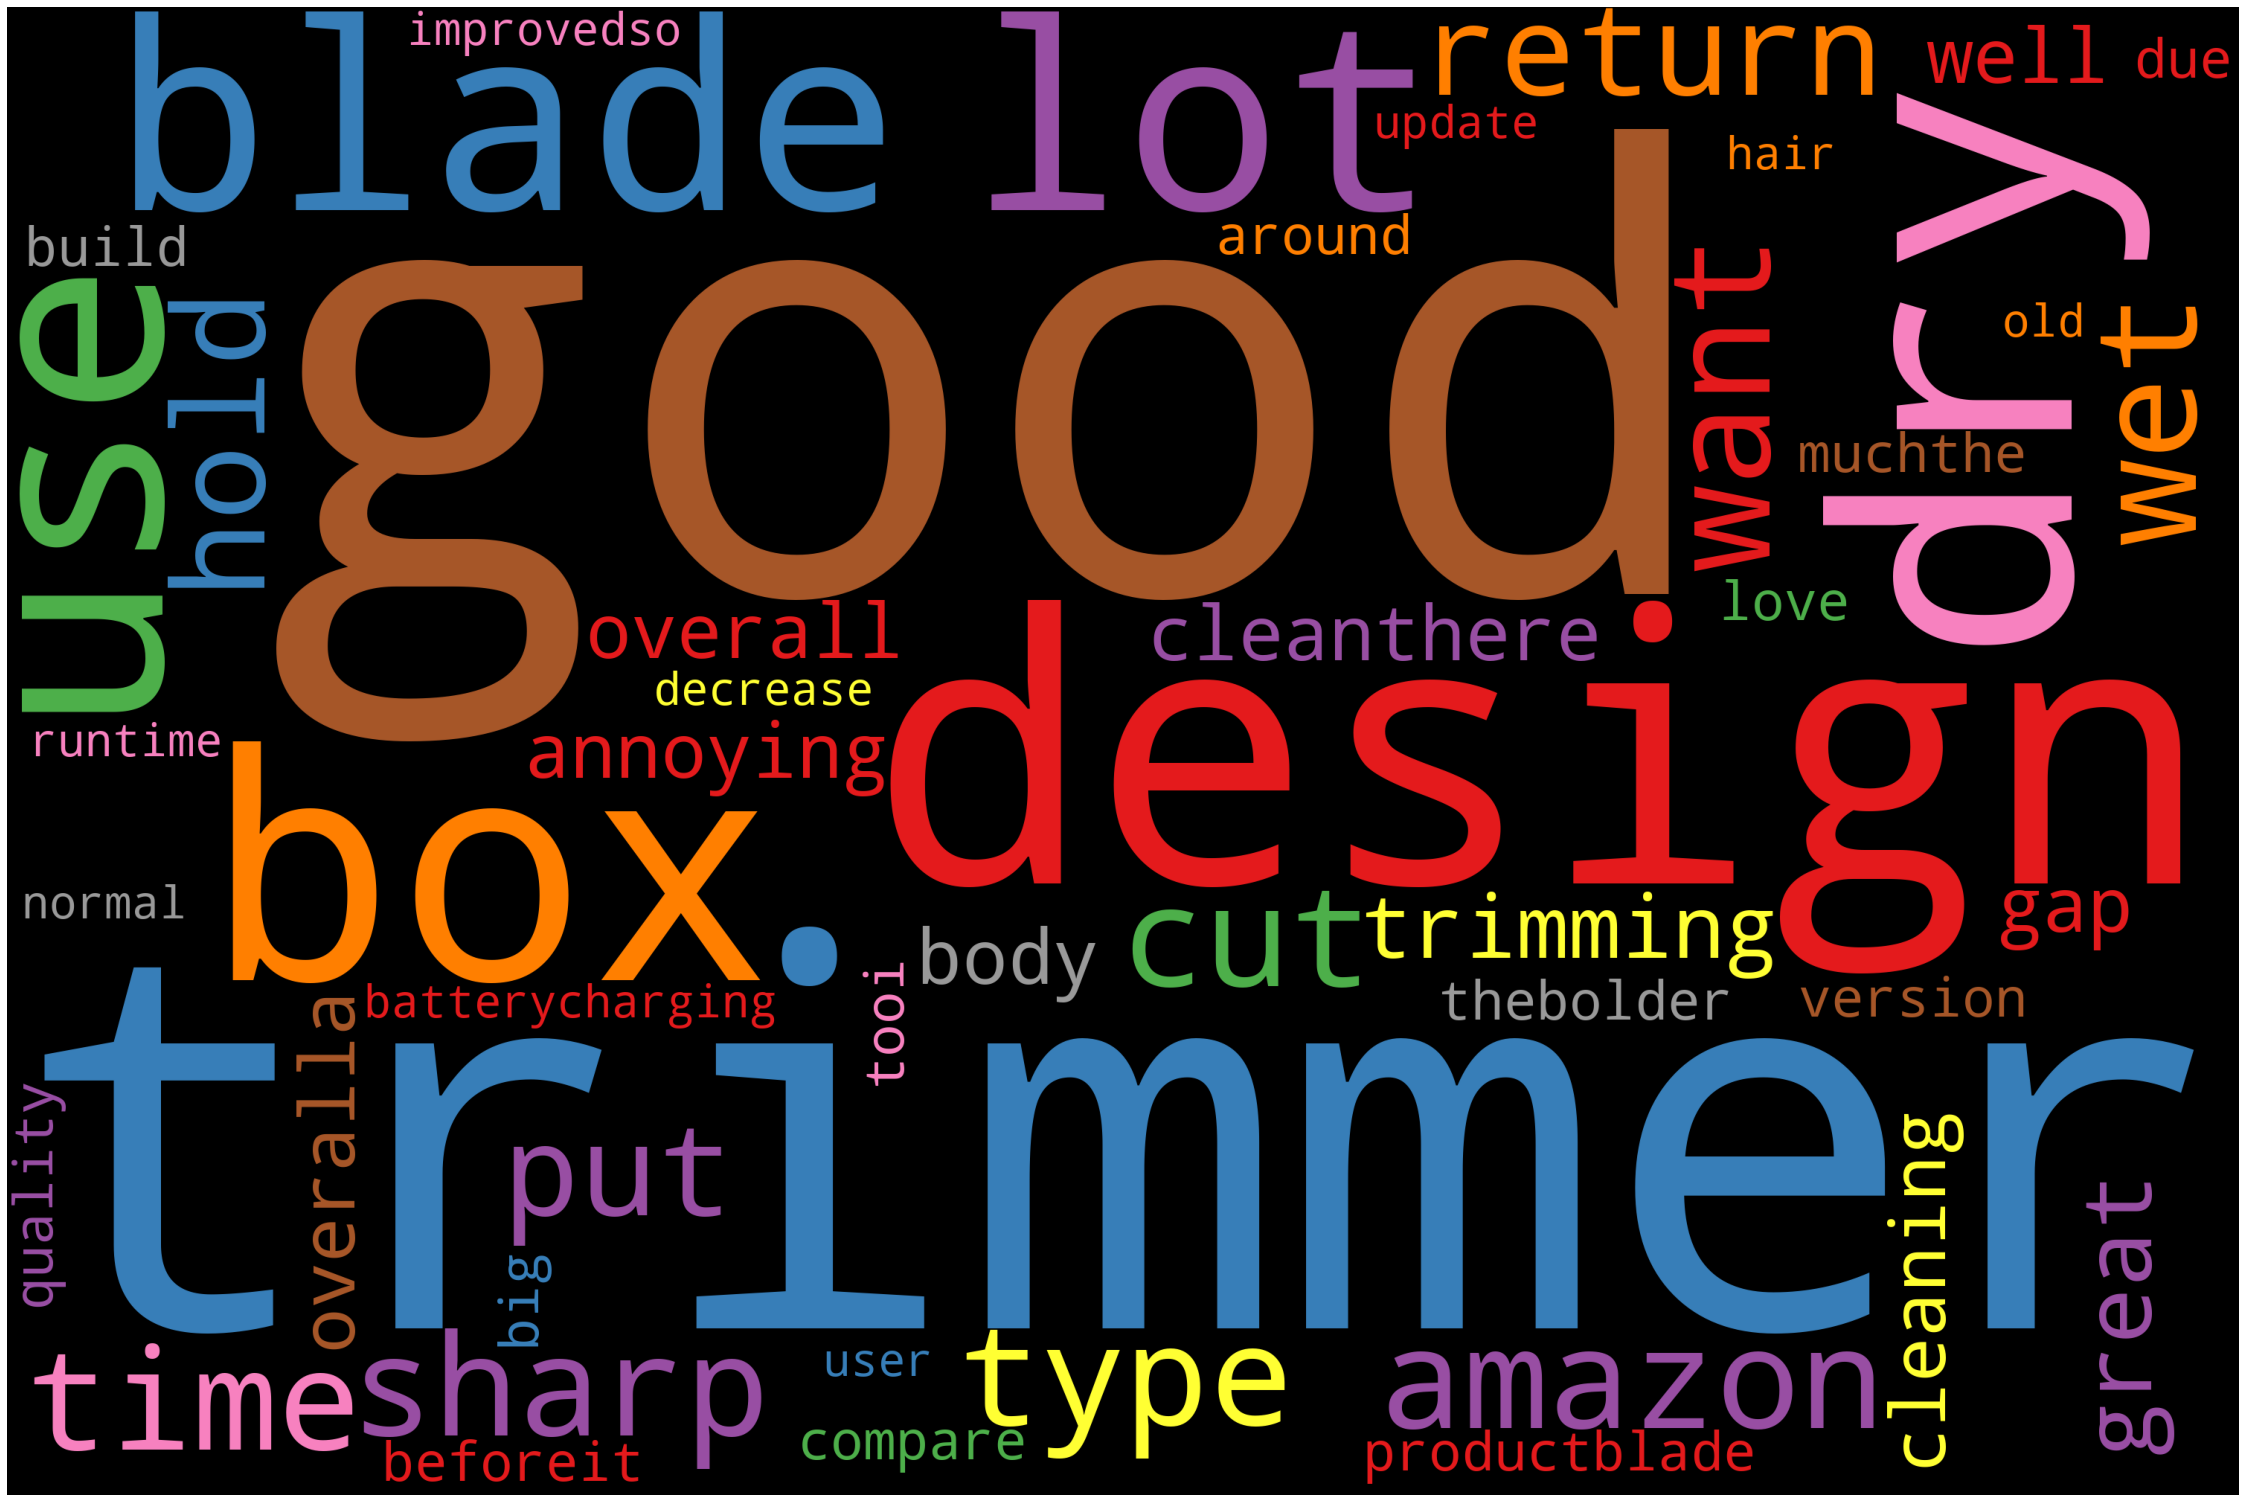

In [56]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_revw)
plot_cloud(wordcloud)

### Step-6: Named Entity Recognition (NER)

In [57]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_revw
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [58]:
for token in doc_block[:238]:
    print(token,token.pos_)    

trimmer NOUN
great ADJ
trimming NOUN
annoying ADJ
cleanthere NOUN
lot NOUN
gap NOUN
blade NOUN
body NOUN
design NOUN
well ADV
use VERB
trimmer NOUN
overall ADJ
good ADJ
cleaning NOUN
good ADJ
overalla NOUN
good ADJ
productblade ADJ
sharp ADJ
build NOUN
quality NOUN
good ADJ
tooi PROPN
thebolder NOUN
version NOUN
around ADP
8 NUM
love NOUN
design NOUN
muchthe NOUN
design NOUN
good ADJ
compare NOUN
beforeit PROPN
could AUX
due VERB
big ADJ
batterycharging NOUN
time NOUN
decrease NOUN
lot NOUN
runtime NOUN
improvedso NOUN
good ADJ
update NOUN
old ADJ
user NOUN
like ADP
blade NOUN
sharp ADJ
cut ADJ
normal ADJ
trimmer NOUN
hair NOUN
cut VERB
good ADJ
one NUM
not PART
bad ADJ
product NOUN
good ADJ
purchase NOUN
trimmer NOUN
7 NUM
year NOUN
ago ADV
buy VERB
think VERB
wet PROPN
dry ADJ
type NOUN
trimmer NOUN
realise NOUN
dry ADJ
use NOUN
amazon NOUN
would AUX
not PART
take VERB
back ADP
want VERB
return NOUN
get VERB
wet ADJ
dry ADJ
type NOUN
onethe NOUN
trimmer NOUN
good ADJ
relatively ADV
c

In [59]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:238])

['trimmer', 'trimming', 'cleanthere', 'lot', 'gap', 'blade', 'body', 'design', 'use', 'trimmer', 'cleaning', 'overalla', 'build', 'quality', 'thebolder', 'version', 'love', 'design', 'muchthe', 'design', 'compare', 'due', 'batterycharging', 'time', 'decrease', 'lot', 'runtime', 'improvedso', 'update', 'user', 'blade', 'trimmer', 'hair', 'cut', 'product', 'purchase', 'trimmer', 'year', 'buy', 'think', 'type', 'trimmer', 'realise', 'use', 'amazon', 'take', 'want', 'return', 'get', 'type', 'onethe', 'trimmer', 'shave', 'kind', 'hold', 'design', 'trimmer', 'ergonomic', 'hold', 'charge', 'time', 'battery', 'life', 'size', 'part', 'miss', 'box', 'brown', 'look', 'import', 'bulk', 'put', 'cardboard', 'put', 'sticker', 'want', 'return', 'creditablity', 'amazon']


In [60]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,trimmer,7
1,design,4
2,lot,2
3,blade,2
4,use,2
5,time,2
6,type,2
7,amazon,2
8,want,2
9,return,2


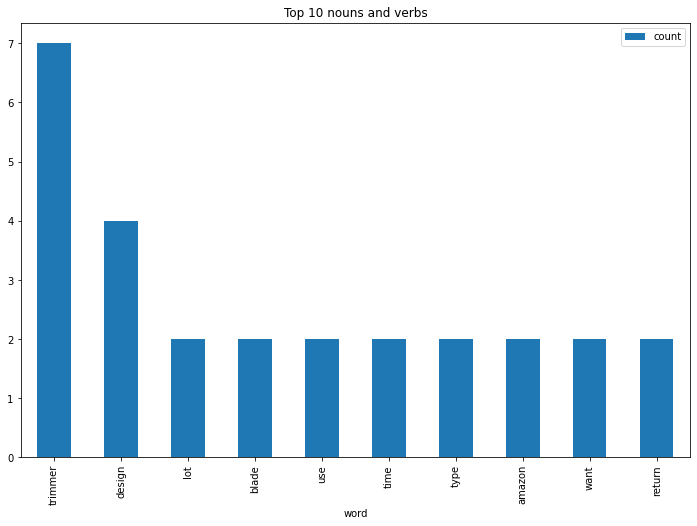

In [61]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

### Step-7: Emotion Mining - Sentiment Analysis

In [62]:
sentences=tokenize.sent_tokenize(' '.join(revw_data))
sentences

["Trimmer is great for trimming but very annoying to clean.There is lots of gap between the blades and the body, they should have designed it better I m using this trimmer overall is good cleaning good Overalla good product.Blades are sharp and build quality is good too.I had thebolder version for around 8 yrs qt4005And i loved that design too much.The design here is good but not as compared to before....it could be due to bigger battery.Charging time has decreased a lot and runtime had improved.So a good update for an old user like me Blade is no sharp cut .it's normal trimmer hair  cutting Good one Not a bad product, but it is not good as I purchased the trimmer 7 years ago I bought this thinking it was a wet and dry type trimmer.",
 "Realised it's only dry use.",
 "Amazon wouldn't take it back as I wanted to return this and get a wet & dry type one.The trimmer is good for a relatively close shave but is kind of bulky and odd to hold.",
 'They should have designed the trimmer to be e

In [63]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Trimmer is great for trimming but very annoyin...
1,Realised it's only dry use.
2,Amazon wouldn't take it back as I wanted to re...
3,They should have designed the trimmer to be er...
4,It does hold charge for a long time though.
5,Battery life.
6,Size adjustable part missed Outer box is brown.
7,It looks someone import bulk and put in cardbo...
8,In shop there is beautiful box.
9,I want to return but it is unreturnable.


#### Emotion Lexicon - Affin

In [64]:
affin=pd.read_csv('Afinn.csv',sep=',',encoding='latin1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [65]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [66]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [67]:
# manual testing
calculate_sentiment(text='great')

3

#### Calculating sentiment value for each sentence

In [68]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     31
1      0
2      4
3      0
4      0
5      0
6     -2
7      0
8      3
9      1
10    -3
Name: sentiment_value, dtype: int64

#### How many words are there in a sentence?

In [69]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     136
1       5
2      36
3       9
4       9
5       2
6       8
7      15
8       6
9       8
10      6
Name: word_count, dtype: int64

In [70]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
10,It is loosing creditablity of Amazon,-3,6
6,Size adjustable part missed Outer box is brown.,-2,8
1,Realised it's only dry use.,0,5
3,They should have designed the trimmer to be er...,0,9
4,It does hold charge for a long time though.,0,9
5,Battery life.,0,2
7,It looks someone import bulk and put in cardbo...,0,15
9,I want to return but it is unreturnable.,1,8
8,In shop there is beautiful box.,3,6
2,Amazon wouldn't take it back as I wanted to re...,4,36


#### Sentiment score

In [71]:
sent_df['sentiment_value'].describe()

count    11.000000
mean      3.090909
std       9.459963
min      -3.000000
25%       0.000000
50%       0.000000
75%       2.000000
max      31.000000
Name: sentiment_value, dtype: float64

#### Negative sentiment score

In [72]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,Realised it's only dry use.,0,5
3,They should have designed the trimmer to be er...,0,9
4,It does hold charge for a long time though.,0,9
5,Battery life.,0,2
6,Size adjustable part missed Outer box is brown.,-2,8
7,It looks someone import bulk and put in cardbo...,0,15
10,It is loosing creditablity of Amazon,-3,6


#### Positive sentiment score

In [73]:
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Trimmer is great for trimming but very annoyin...,31,136
2,Amazon wouldn't take it back as I wanted to re...,4,36
8,In shop there is beautiful box.,3,6
9,I want to return but it is unreturnable.,1,8


In [74]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Trimmer is great for trimming but very annoyin...,31,136,0
1,Realised it's only dry use.,0,5,1
2,Amazon wouldn't take it back as I wanted to re...,4,36,2
3,They should have designed the trimmer to be er...,0,9,3
4,It does hold charge for a long time though.,0,9,4
5,Battery life.,0,2,5
6,Size adjustable part missed Outer box is brown.,-2,8,6
7,It looks someone import bulk and put in cardbo...,0,15,7
8,In shop there is beautiful box.,3,6,8
9,I want to return but it is unreturnable.,1,8,9


#### Plotting the sentiment value

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

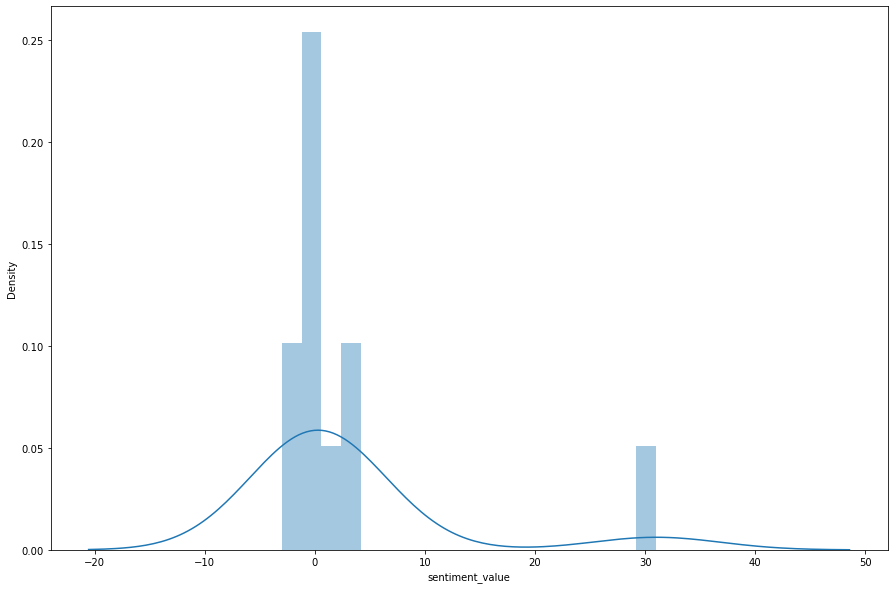

In [75]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

#### Plotting the line plot for sentiment value

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

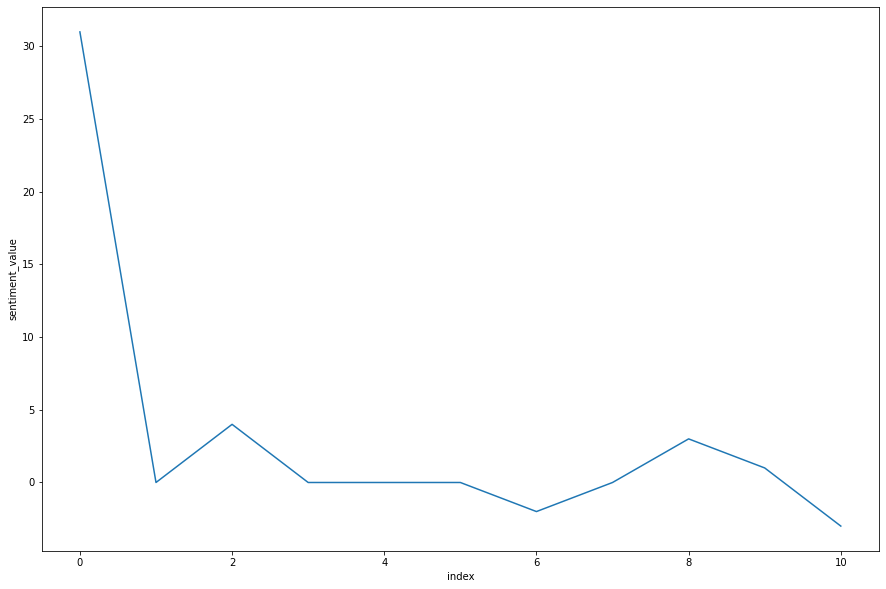

In [76]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

#### Correlation analysis

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

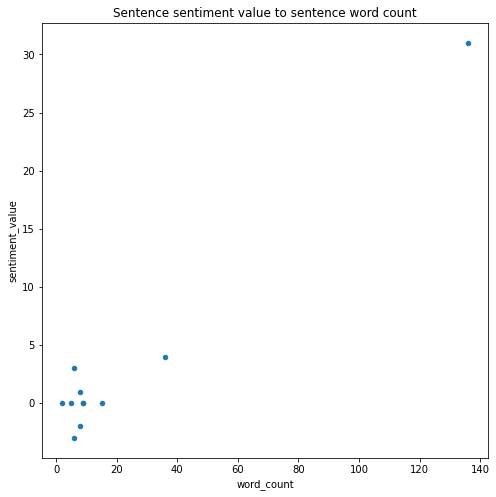

In [77]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')